In [2]:
import pandas as pd 
import io

In [3]:
csv_data = """,team,win_pct,yds,ol,dl,pass_td,int,passer_rating,pen,pen_yds,points_allowed,rush_att,rush_td,rush_yds,rush_yds_game,score_pct,score_pct_allowed,sk_allowed_pct,to_forced_pct,to_pct,yds_allowed_per_play,yds_per_pass,yds_per_rush,te,lb,db
0,Chiefs,0.824,7032,3,2,41,12,104.7,87,838,369,417,18,1970,115.9,46.4,35.9,3.8,10.3,10.1,5.1,7.5,4.7,6.1,4.798,3.892
1,Eagles,0.824,6614,3,3,25,9,99.0,90,682,344,544,32,2509,147.6,42.5,32.4,7.6,15.1,10.2,4.8,7.1,4.6,5.85,4.4879999999999995,3.552
2,Cowboys,0.706,6034,2,2,28,18,87.9,104,842,342,531,24,2298,135.2,41.5,33.5,4.6,16.2,10.8,5.1,6.4,4.3,5.35,4.75,3.7
3,Bills,0.813,6361,2,3,35,14,95.8,92,709,286,430,15,2232,139.5,45.0,31.0,5.4,14.3,15.2,5.1,6.8,5.2,6.0,4.7,3.5000000000000004
4,Lions,0.529,6460,2,1,29,7,99.3,90,773,427,480,23,2179,128.2,43.2,41.2,3.9,11.9,8.0,6.2,7.0,4.5,5.75,5.784000000000001,4.5360000000000005
5,49ers,0.765,6216,2,3,30,9,102.3,94,730,277,504,20,2360,138.8,41.4,25.7,5.7,15.3,9.1,5.0,7.1,4.7,5.9,4.514,3.056
6,Vikings,0.765,6145,2,2,30,15,93.1,88,684,427,404,18,1661,97.7,36.0,41.1,6.5,12.0,11.7,5.9,6.2,4.1,5.15,5.542000000000001,4.468
7,Bengals,0.75,5768,2,1,35,12,101.0,81,623,322,399,14,1528,95.5,41.5,36.4,6.7,13.1,9.7,5.4,6.5,3.8,5.15,5.048,3.992
8,Seahawks,0.529,5976,2,2,30,12,100.0,106,854,401,425,12,2042,120.1,40.6,37.2,7.4,12.2,11.2,5.5,6.4,4.8,5.6,5.144,4.0760000000000005
9,Jaguars,0.529,6075,1,2,25,9,93.9,90,674,350,448,16,2116,124.5,39.2,36.1,4.5,14.4,12.2,5.4,6.3,4.7,5.5,5.042000000000001,3.9680000000000004
10,Dolphins,0.529,6197,2,3,30,15,95.0,111,881,399,390,12,1686,99.2,38.8,37.5,5.7,7.6,11.8,5.3,7.3,4.3,5.8,4.99,4.0600000000000005
11,Raiders,0.353,5993,3,2,28,17,86.7,113,932,418,428,12,2059,121.1,42.4,40.8,5.6,7.3,12.2,5.8,6.3,4.8,5.55,5.4559999999999995,4.424
12,Chargers,0.588,6108,1,1,26,10,93.3,81,635,384,404,15,1524,89.6,38.1,37.2,5.2,11.2,9.5,5.9,6.1,3.8,4.949999999999999,5.464,4.156000000000001
13,Packers,0.471,5745,3,2,27,12,91.9,89,747,371,456,12,2113,124.3,36.2,38.2,5.4,13.9,11.3,5.8,6.1,4.6,5.35,5.404,4.216
14,Falcons,0.412,5417,2,1,17,9,87.7,68,594,386,559,17,2718,159.9,39.5,43.5,8.2,10.0,11.4,5.7,6.0,4.9,5.45,5.430000000000001,4.62
15,Giants,0.559,5676,1,2,17,6,91.1,106,827,371,520,21,2519,148.2,37.3,39.8,8.6,8.8,7.3,5.6,5.5,4.8,5.15,5.276,4.303999999999999
16,Patriots,0.471,5348,2,2,19,14,87.7,104,841,347,425,12,1812,106.6,32.8,30.5,7.1,14.2,12.0,5.0,6.1,4.3,5.199999999999999,4.61,3.44
17,Browns,0.412,5934,3,3,19,12,84.9,102,865,381,532,19,2490,146.5,34.6,38.5,7.5,10.2,11.2,5.4,5.9,4.7,5.300000000000001,5.09,4.16
18,Ravens,0.588,5760,3,2,19,13,82.5,82,678,315,526,14,2720,160.0,38.9,35.8,7.2,13.9,11.7,5.3,5.8,5.2,5.5,4.956,3.924
19,Panthers,0.412,5206,3,2,16,13,80.2,104,862,374,483,16,2210,130.0,35.3,34.2,7.3,8.3,9.6,5.4,6.1,4.6,5.35,5.0040000000000004,3.8160000000000007
20,Cardinals,0.235,5499,3,2,17,17,79.2,118,916,449,434,15,1873,110.2,32.1,41.6,6.5,10.5,12.8,5.5,5.1,4.3,4.699999999999999,5.232,4.428000000000001
21,Saints,0.412,5674,2,1,24,14,93.6,99,841,345,465,12,1982,116.6,31.7,34.8,6.9,7.1,12.9,5.0,6.7,4.3,5.5,4.696,3.784
22,Bears,0.176,5233,3,2,19,15,80.3,80,754,463,558,18,3014,177.3,34.3,41.8,13.3,11.9,12.7,6.1,5.1,5.4,5.25,5.716,4.564
23,Commanders,0.5,5615,2,2,24,16,84.7,92,805,343,538,9,2143,126.1,29.4,31.5,8.0,7.6,11.7,5.2,5.8,4.0,4.9,4.79,3.56
24,Buccaneers,0.471,5894,1,2,26,10,89.8,99,793,358,386,5,1308,76.9,32.0,33.0,2.8,10.2,10.3,5.1,5.9,3.4,4.65,4.74,3.66
25,Steelers,0.529,5484,3,1,12,14,78.7,94,711,346,500,16,2073,121.9,35.0,37.3,6.2,13.0,9.6,5.5,5.6,4.1,4.85,5.146000000000001,4.084
26,Rams,0.294,4769,3,3,16,15,82.3,76,655,384,411,15,1661,97.7,33.5,41.0,10.0,12.1,13.1,5.5,5.3,4.0,4.65,5.220000000000001,4.38
27,Titans,0.412,5045,2,2,16,11,85.3,111,956,359,487,16,2131,125.4,27.9,33.9,9.7,10.6,10.5,5.4,5.8,4.4,5.1,4.998,3.792
28,Jets,0.412,5409,1,3,15,14,75.0,91,866,316,405,13,1686,99.2,29.9,32.3,6.3,8.3,11.9,4.8,5.6,4.2,4.9,4.486,3.5439999999999996
29,Texans,0.206,4820,1,2,20,19,76.8,88,644,420,398,7,1476,86.8,28.8,35.2,6.2,11.9,13.6,5.7,5.4,3.7,4.550000000000001,5.264000000000001,3.956000000000001
30,Colts,0.265,5298,2,2,17,20,79.2,89,794,427,439,8,1866,109.8,29.2,36.0,9.0,10.2,16.9,5.2,5.2,4.3,4.75,4.88,3.9200000000000004
31,Broncos,0.294,5527,3,3,18,15,81.2,113,970,359,444,11,1935,113.8,28.6,35.9,9.9,10.6,10.6,5.0,5.7,4.4,5.050000000000001,4.718,3.872"""


In [4]:
df = pd.read_csv(io.StringIO(csv_data))

In [5]:
df.head(5)

,Unnamed: 0,team,win_pct,yds,ol,dl,pass_td,int,passer_rating,pen,...,score_pct_allowed,sk_allowed_pct,to_forced_pct,to_pct,yds_allowed_per_play,yds_per_pass,yds_per_rush,te,lb,db
0,0,Chiefs,0.824,7032,3,2,41,12,104.7,87,...,35.9,3.8,10.3,10.1,5.1,7.5,4.7,6.10,4.798,3.892
1,1,Eagles,0.824,6614,3,3,25,9,99.0,90,...,32.4,7.6,15.1,10.2,4.8,7.1,4.6,5.85,4.488,3.552
2,2,Cowboys,0.706,6034,2,2,28,18,87.9,104,...,33.5,4.6,16.2,10.8,5.1,6.4,4.3,5.35,4.750,3.700
3,3,Bills,0.813,6361,2,3,35,14,95.8,92,...,31.0,5.4,14.3,15.2,5.1,6.8,5.2,6.00,4.700,3.500
4,4,Lions,0.529,6460,2,1,29,7,99.3,90,...,41.2,3.9,11.9,8.0,6.2,7.0,4.5,5.75,5.784,4.536


In [6]:
print(df.dtypes) 

Unnamed: 0                int64
team                     object
win_pct                 float64
yds                       int64
ol                        int64
dl                        int64
pass_td                   int64
int                       int64
passer_rating           float64
pen                       int64
pen_yds                   int64
points_allowed            int64
rush_att                  int64
rush_td                   int64
rush_yds                  int64
rush_yds_game           float64
score_pct               float64
score_pct_allowed       float64
sk_allowed_pct          float64
to_forced_pct           float64
to_pct                  float64
yds_allowed_per_play    float64
yds_per_pass            float64
yds_per_rush            float64
te                      float64
lb                      float64
db                      float64
dtype: object


In [7]:
df = df.fillna(0)

In [8]:
defensive_stats = ['points_allowed', 'score_pct_allowed', 'yds_allowed_per_play', 'to_forced_pct', 'int', 'pen', 'pen_yds', 'dl', 'lb', 'db']

In [9]:
import matplotlib.pyplot as plt
def plot_with_labels(x, y, data, xlabel, ylabel, title):
    plt.figure(figsize=(12, 8))
    plt.scatter(data[x], data[y], color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    # Add team labels
    for i, txt in enumerate(data['team']):
        plt.annotate(txt, (data[x].iloc[i], data[y].iloc[i]),
                     textcoords="offset points", xytext=(5,5), ha='left', fontsize=8)
    
    plt.show()




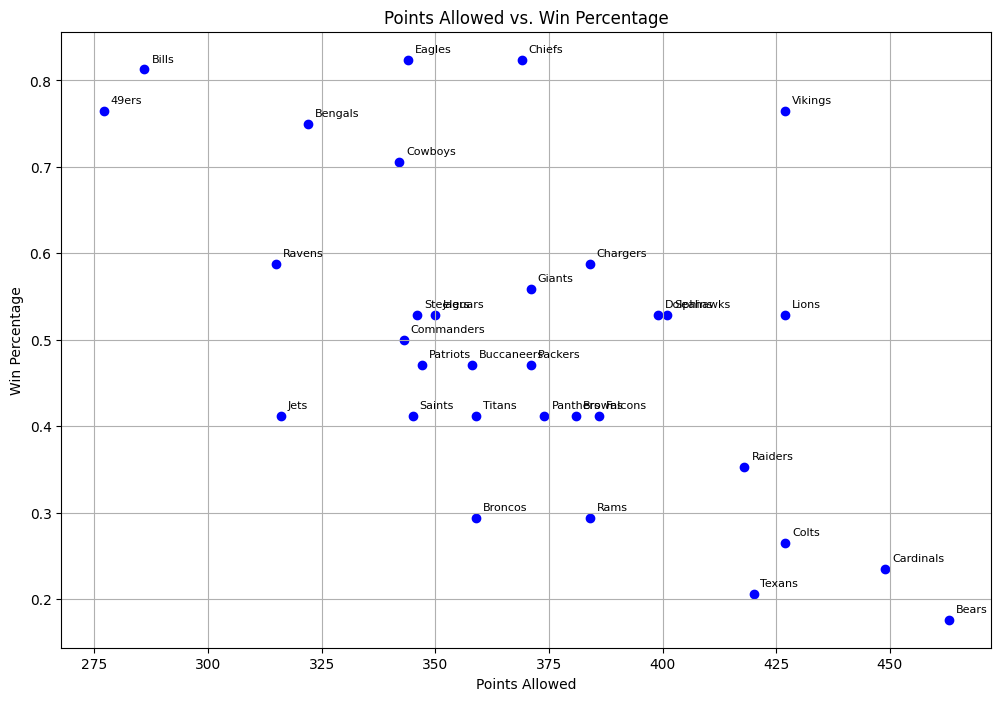

In [10]:
plot_with_labels(
    x='points_allowed',
    y='win_pct',
    data=df,
    xlabel='Points Allowed',
    ylabel='Win Percentage',
    title='Points Allowed vs. Win Percentage'
)


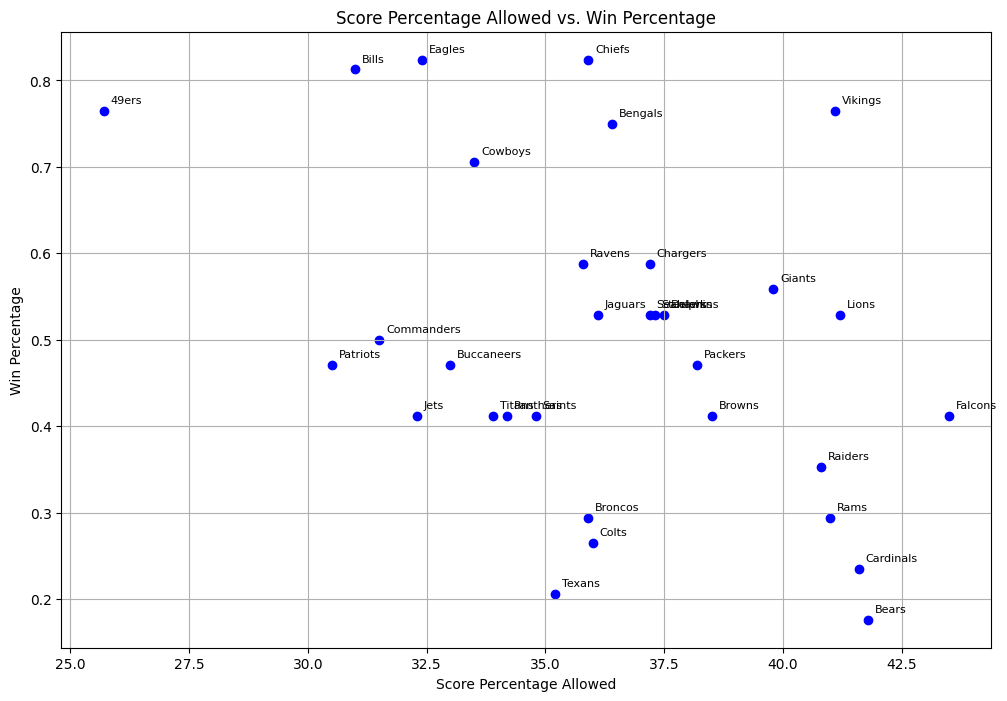

In [11]:
plot_with_labels(
    x='score_pct_allowed',
    y='win_pct',
    data=df,
    xlabel='Score Percentage Allowed',
    ylabel='Win Percentage',
    title='Score Percentage Allowed vs. Win Percentage'
)


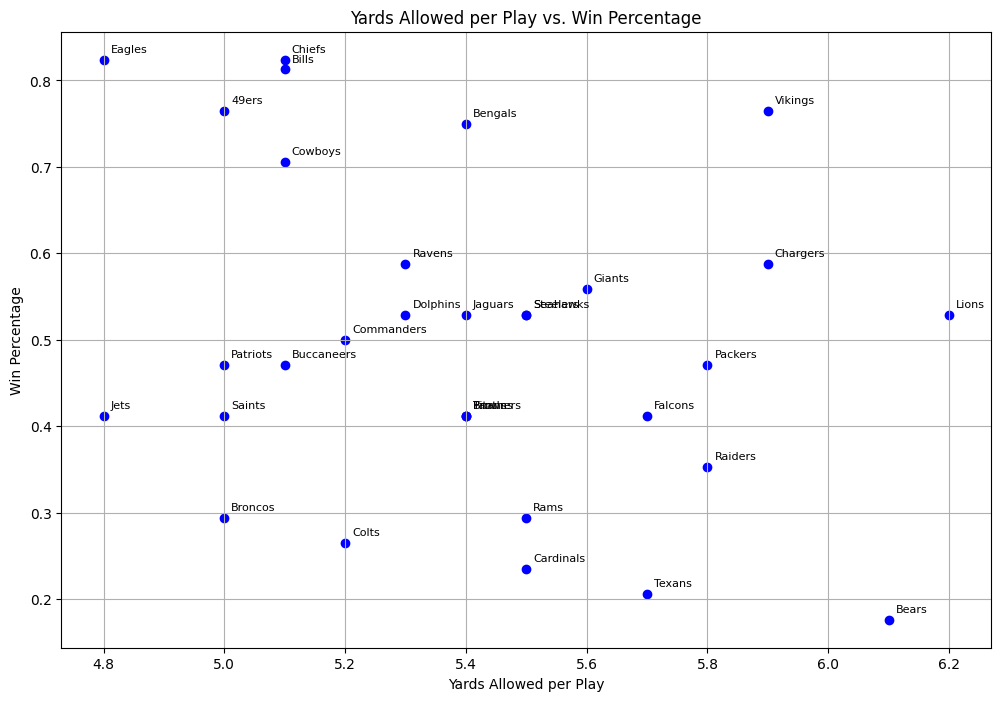

In [12]:
plot_with_labels(
    x='yds_allowed_per_play',
    y='win_pct',
    data=df,
    xlabel='Yards Allowed per Play',
    ylabel='Win Percentage',
    title='Yards Allowed per Play vs. Win Percentage'
)


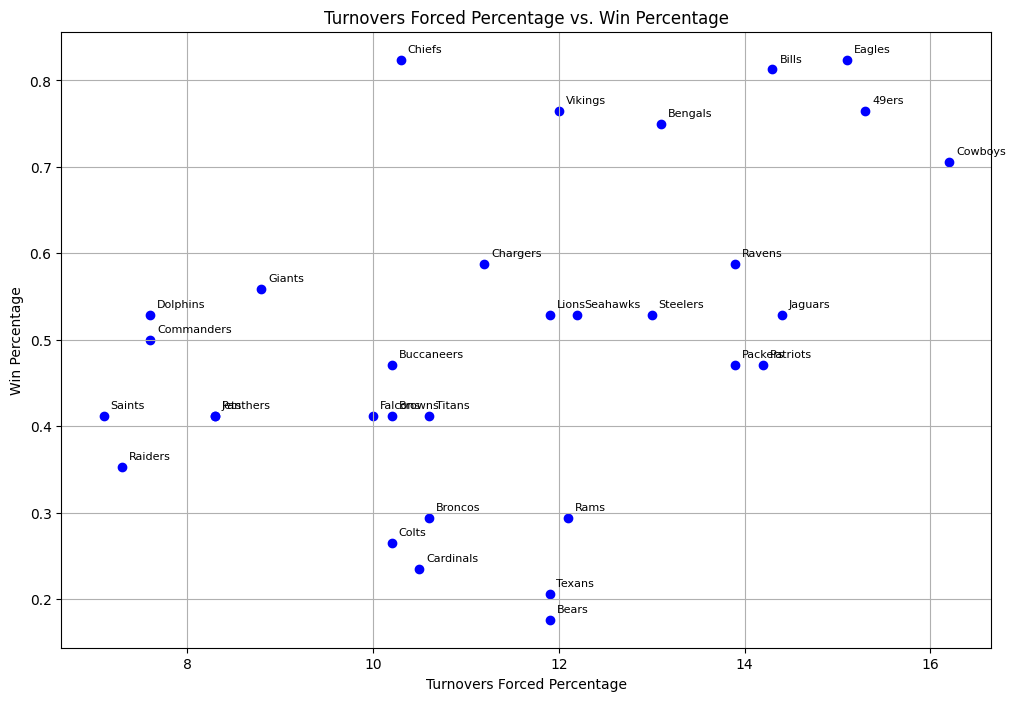

In [13]:
plot_with_labels(
    x='to_forced_pct',
    y='win_pct',
    data=df,
    xlabel='Turnovers Forced Percentage',
    ylabel='Win Percentage',
    title='Turnovers Forced Percentage vs. Win Percentage'
)


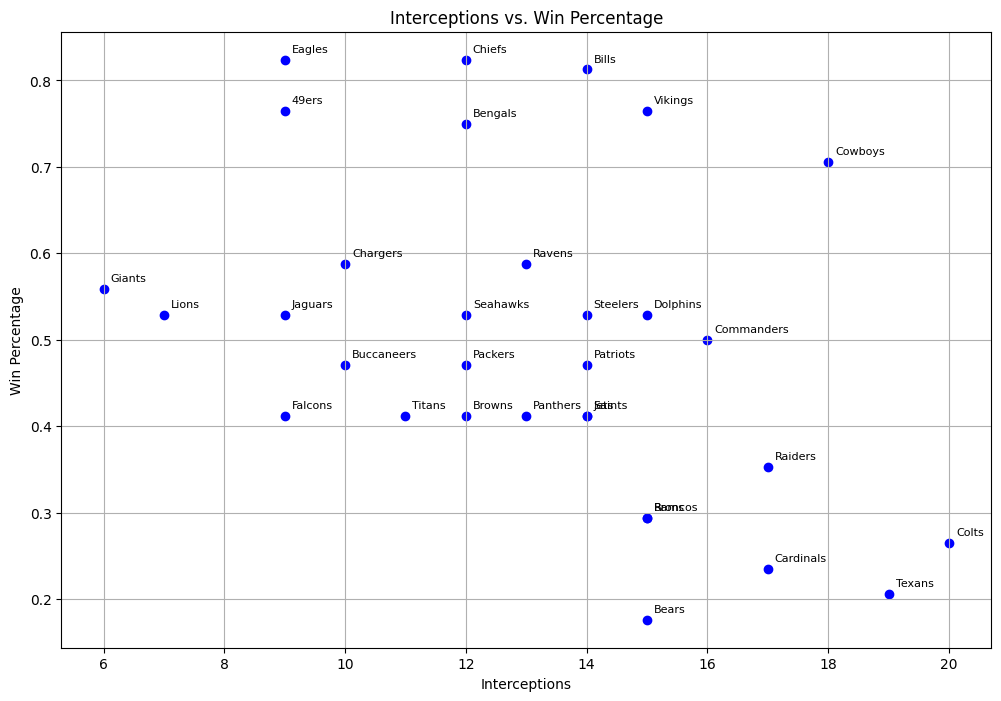

In [14]:
plot_with_labels(
    x='int',
    y='win_pct',
    data=df,
    xlabel='Interceptions',
    ylabel='Win Percentage',
    title='Interceptions vs. Win Percentage'
)


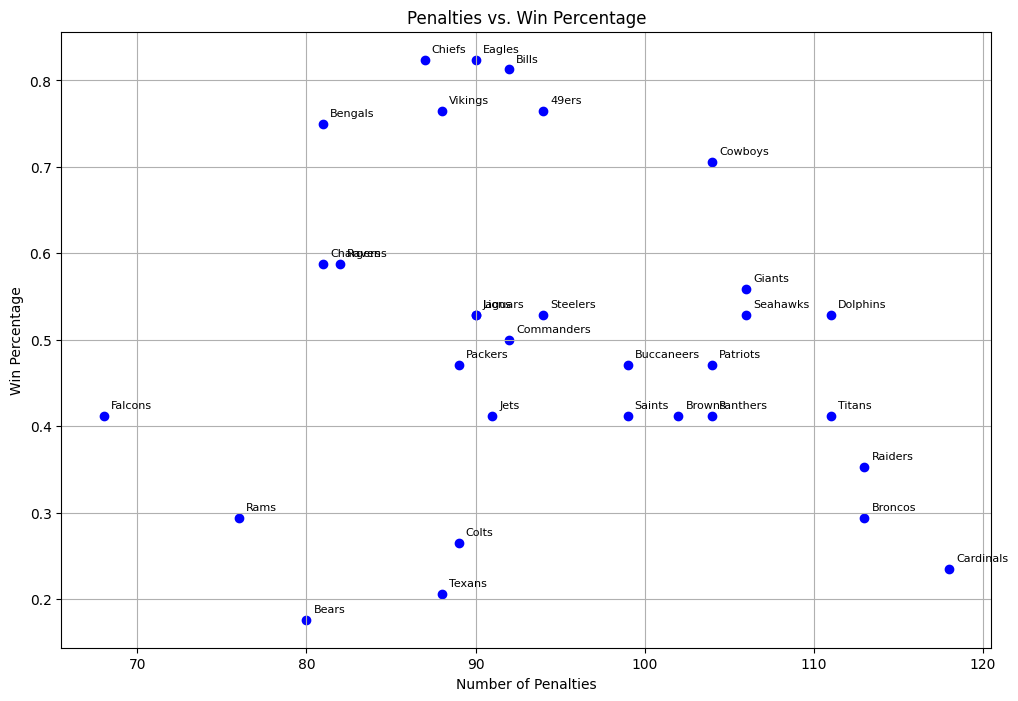

In [15]:
plot_with_labels(
    x='pen',
    y='win_pct',
    data=df,
    xlabel='Number of Penalties',
    ylabel='Win Percentage',
    title='Penalties vs. Win Percentage'
)


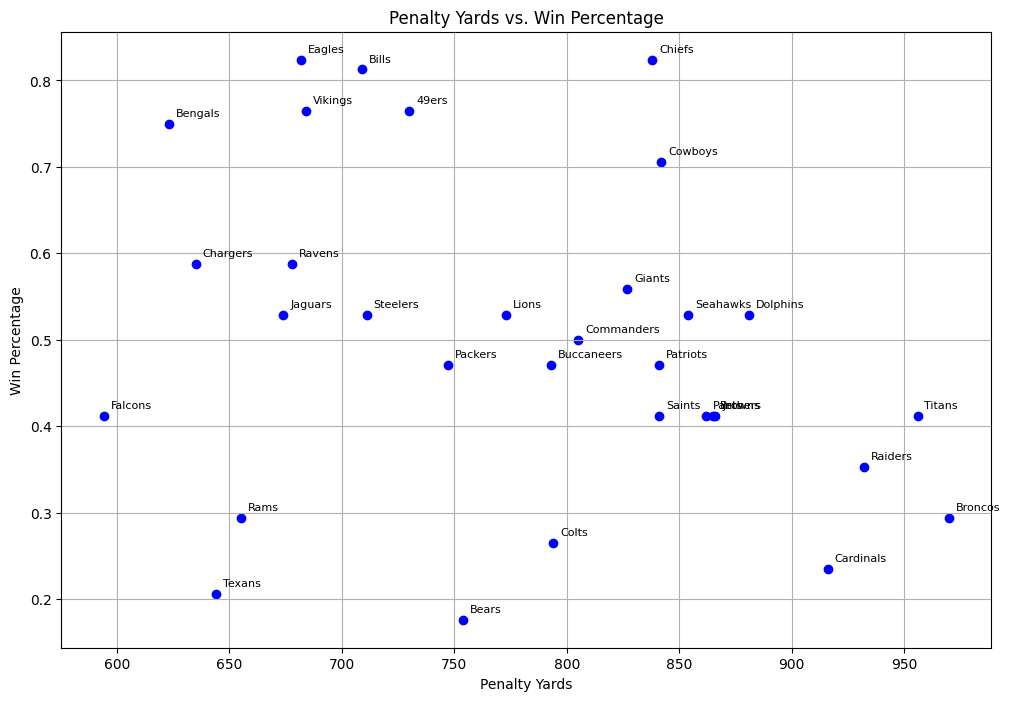

In [16]:
plot_with_labels(
    x='pen_yds',
    y='win_pct',
    data=df,
    xlabel='Penalty Yards',
    ylabel='Win Percentage',
    title='Penalty Yards vs. Win Percentage'
)


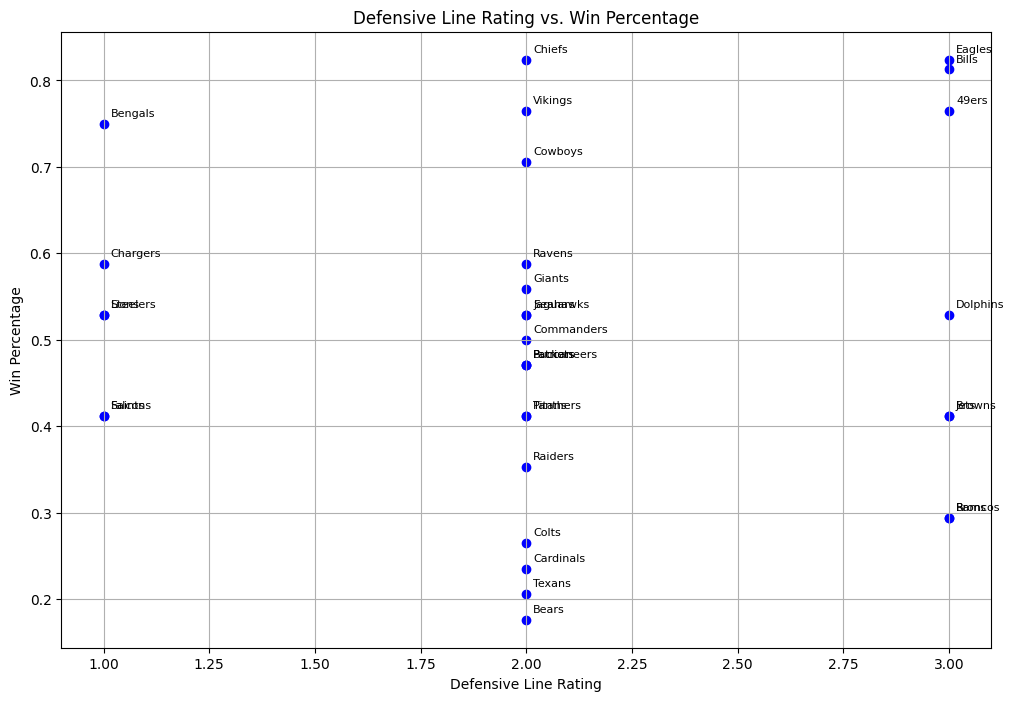

In [17]:
plot_with_labels(
    x='dl',
    y='win_pct',
    data=df,
    xlabel='Defensive Line Rating',
    ylabel='Win Percentage',
    title='Defensive Line Rating vs. Win Percentage'
)


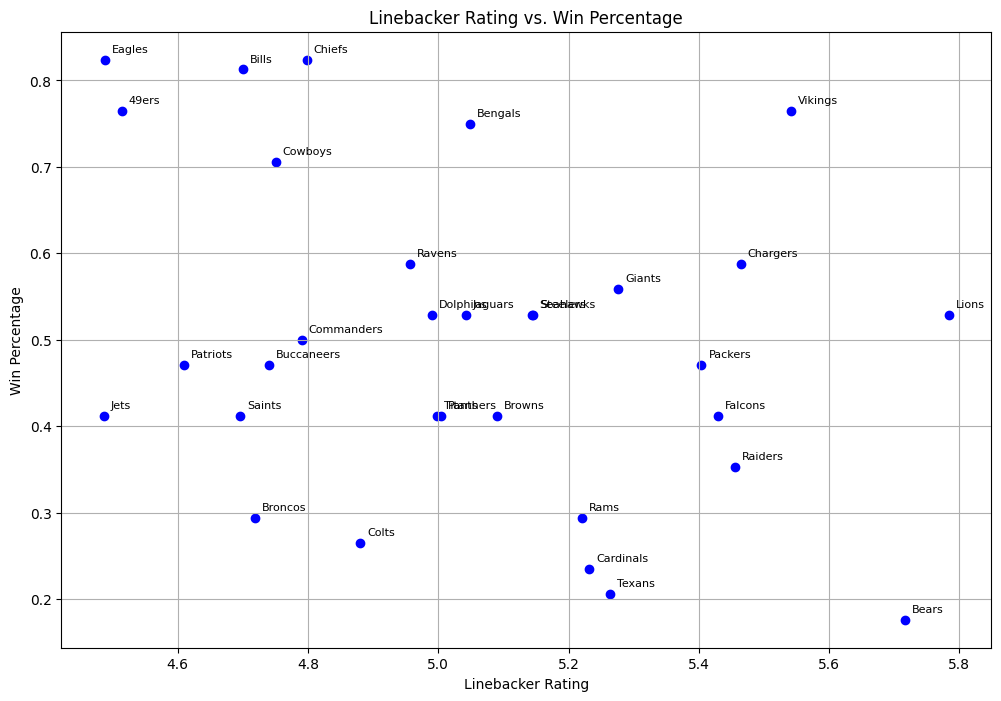

In [18]:
plot_with_labels(
    x='lb',
    y='win_pct',
    data=df,
    xlabel='Linebacker Rating',
    ylabel='Win Percentage',
    title='Linebacker Rating vs. Win Percentage'
)


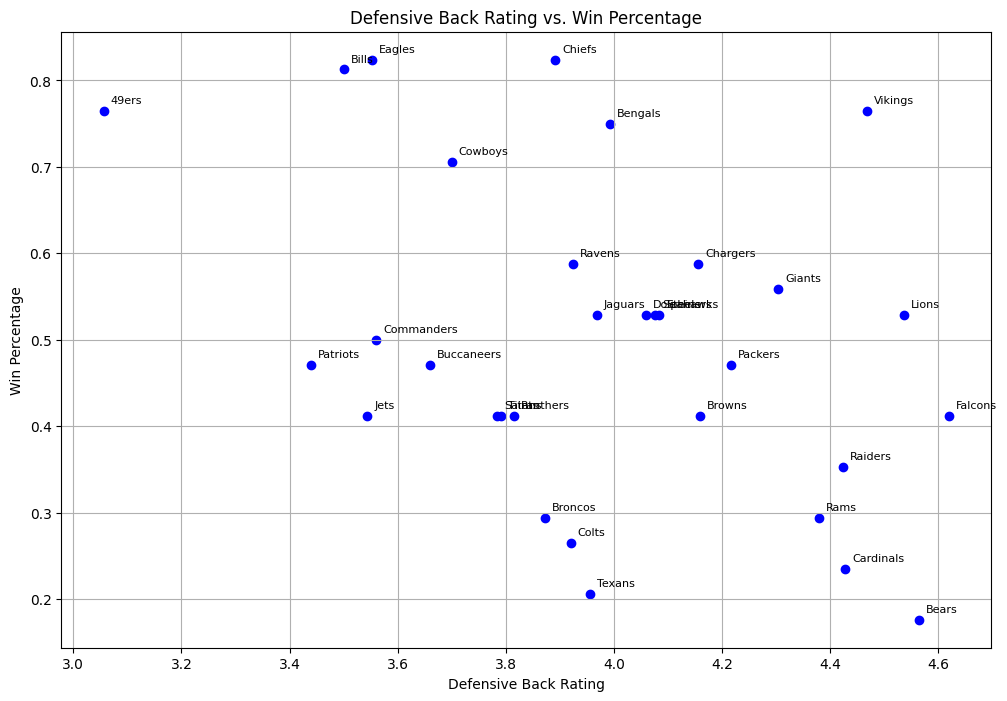

In [19]:
plot_with_labels(
    x='db',
    y='win_pct',
    data=df,
    xlabel='Defensive Back Rating',
    ylabel='Win Percentage',
    title='Defensive Back Rating vs. Win Percentage'
)


In [20]:
# Select the defensive stats and win percentage
defensive_stats = ['points_allowed', 'score_pct_allowed', 'yds_allowed_per_play',
                   'to_forced_pct', 'int', 'pen', 'pen_yds', 'dl', 'lb', 'db']

analysis_df = df[defensive_stats + ['win_pct']]

# Calculate the correlation matrix
corr_matrix = analysis_df.corr()

# Display the correlation of each defensive stat with win percentage
correlations = corr_matrix['win_pct'].sort_values(ascending=False)
abs_correlations = abs(correlations).sort_values(ascending=False)
# Combine the original correlations with their absolute values into a DataFrame
corr_df = pd.DataFrame({
    'Correlation': correlations,
    'Absolute Correlation': abs_correlations
})
corr_df_sorted = corr_df.sort_values('Absolute Correlation', ascending=False)

print("Correlation Coefficients with Win Percentage (sorted by absolute value):")
print(corr_df_sorted)


Correlation Coefficients with Win Percentage (sorted by absolute value):
                      Correlation  Absolute Correlation
win_pct                  1.000000              1.000000
points_allowed          -0.572673              0.572673
to_forced_pct            0.445505              0.445505
int                     -0.414891              0.414891
score_pct_allowed       -0.387700              0.387700
db                      -0.381436              0.381436
lb                      -0.313804              0.313804
pen_yds                 -0.294874              0.294874
yds_allowed_per_play    -0.276679              0.276679
pen                     -0.160895              0.160895
dl                       0.031670              0.031670


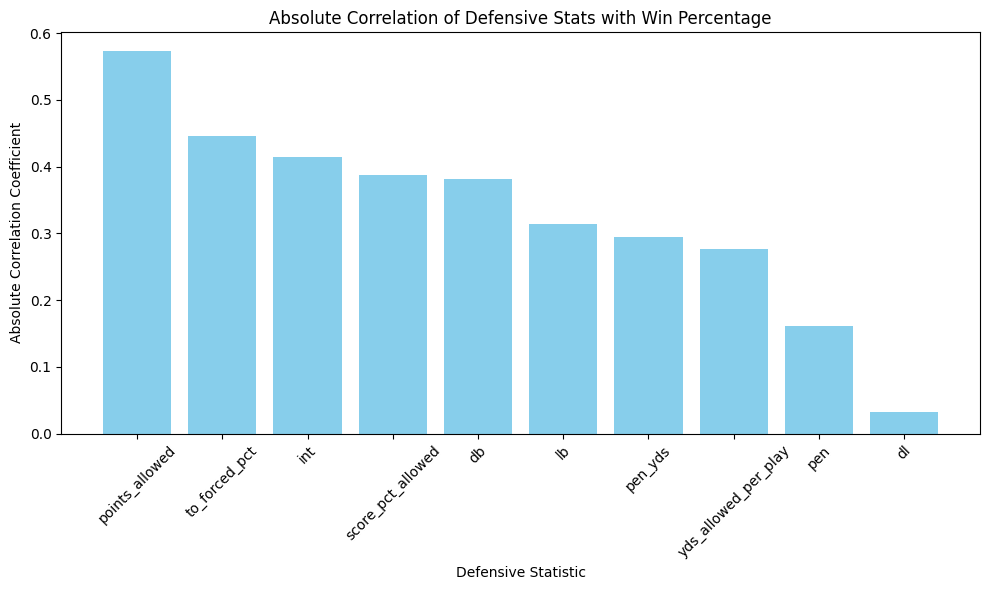

In [21]:
# Exclude 'win_pct' from the plot
corr_df_plot = corr_df_sorted.drop('win_pct')

plt.figure(figsize=(10, 6))
plt.bar(corr_df_plot.index, corr_df_plot['Absolute Correlation'], color='skyblue')
plt.title('Absolute Correlation of Defensive Stats with Win Percentage')
plt.xlabel('Defensive Statistic')
plt.ylabel('Absolute Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# this shows that yards allowed per play is not as important of a defensive statistic as forcing turnovers. 
# This means defenses that can take the ball away should have more success
# players that can take the ball away should impact winning more
# investigate this trend later

In [23]:
from scipy.stats import pearsonr

# Create a DataFrame to store correlations and p-values
corr_pval_df = pd.DataFrame(columns=['Correlation', 'p-value'])

for stat in defensive_stats:
    corr_coef, p_value = pearsonr(df[stat], df['win_pct'])
    corr_pval_df.loc[stat] = [corr_coef, p_value]

# Add Absolute Correlation column
corr_pval_df['Absolute Correlation'] = corr_pval_df['Correlation'].abs()

# Sort by Absolute Correlation
corr_pval_df = corr_pval_df.sort_values('Absolute Correlation', ascending=False)

print("Correlation Coefficients and p-values with Win Percentage:")
print(corr_pval_df)


Correlation Coefficients and p-values with Win Percentage:
                      Correlation   p-value  Absolute Correlation
points_allowed          -0.572673  0.000614              0.572673
to_forced_pct            0.445505  0.010610              0.445505
int                     -0.414891  0.018219              0.414891
score_pct_allowed       -0.387700  0.028346              0.387700
db                      -0.381436  0.031235              0.381436
lb                      -0.313804  0.080290              0.313804
pen_yds                 -0.294874  0.101347              0.294874
yds_allowed_per_play    -0.276679  0.125285              0.276679
pen                     -0.160895  0.379023              0.160895
dl                       0.031670  0.863382              0.031670


In [24]:
#filtering out the data with p value > 0.05 because those are not statistically significant


In [25]:
# Filter metrics with p-value < 0.05
significant_corr_df = corr_pval_df[corr_pval_df['p-value'] < 0.05]

# Sort the significant correlations by absolute value in descending order
significant_corr_df = significant_corr_df.sort_values('Absolute Correlation', ascending=False)

# Display the significant correlations
print("Statistically Significant Correlations with Win Percentage:")
print(significant_corr_df)


Statistically Significant Correlations with Win Percentage:
                   Correlation   p-value  Absolute Correlation
points_allowed       -0.572673  0.000614              0.572673
to_forced_pct         0.445505  0.010610              0.445505
int                  -0.414891  0.018219              0.414891
score_pct_allowed    -0.387700  0.028346              0.387700
db                   -0.381436  0.031235              0.381436


In [26]:
# Now we can get straight to machine learning and regression

In [27]:
import numpy as np

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
print(df.head())

   Unnamed: 0     team  win_pct   yds  ol  dl  pass_td  int  passer_rating  \
0           0   Chiefs    0.824  7032   3   2       41   12          104.7   
1           1   Eagles    0.824  6614   3   3       25    9           99.0   
2           2  Cowboys    0.706  6034   2   2       28   18           87.9   
3           3    Bills    0.813  6361   2   3       35   14           95.8   
4           4    Lions    0.529  6460   2   1       29    7           99.3   

   pen  ...  score_pct_allowed  sk_allowed_pct  to_forced_pct  to_pct  \
0   87  ...               35.9             3.8           10.3    10.1   
1   90  ...               32.4             7.6           15.1    10.2   
2  104  ...               33.5             4.6           16.2    10.8   
3   92  ...               31.0             5.4           14.3    15.2   
4   90  ...               41.2             3.9           11.9     8.0   

   yds_allowed_per_play  yds_per_pass  yds_per_rush    te     lb     db  
0                 

In [32]:
print(df.isnull().sum())

Unnamed: 0              0
team                    0
win_pct                 0
yds                     0
ol                      0
dl                      0
pass_td                 0
int                     0
passer_rating           0
pen                     0
pen_yds                 0
points_allowed          0
rush_att                0
rush_td                 0
rush_yds                0
rush_yds_game           0
score_pct               0
score_pct_allowed       0
sk_allowed_pct          0
to_forced_pct           0
to_pct                  0
yds_allowed_per_play    0
yds_per_pass            0
yds_per_rush            0
te                      0
lb                      0
db                      0
dtype: int64


In [33]:
significant_features = ['points_allowed', 'score_pct_allowed', 'yds_allowed_per_play',
                        'to_forced_pct', 'pen_yds', 'int']

# Define feature matrix X and target vector y
X = df[significant_features]
y = df['win_pct']

In [ ]:
# Linear Regression Model first

In [34]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_lr = StandardScaler()
X_train_lr_scaled  = scaler_lr.fit_transform(X_train_lr)
X_test_lr_scaled = scaler_lr.transform(X_test_lr)

In [35]:
linear_model = LinearRegression()
linear_model.fit(X_train_lr_scaled, y_train_lr)

LinearRegression()

In [36]:
y_pred_lr = linear_model.predict(X_test_lr_scaled)
mse = mean_squared_error(y_test_lr, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lr, y_pred_lr)

In [37]:
print("Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Linear Regression Performance:
Mean Squared Error (MSE): 0.0320
Root Mean Squared Error (RMSE): 0.1789
R-squared (R²): -0.9403


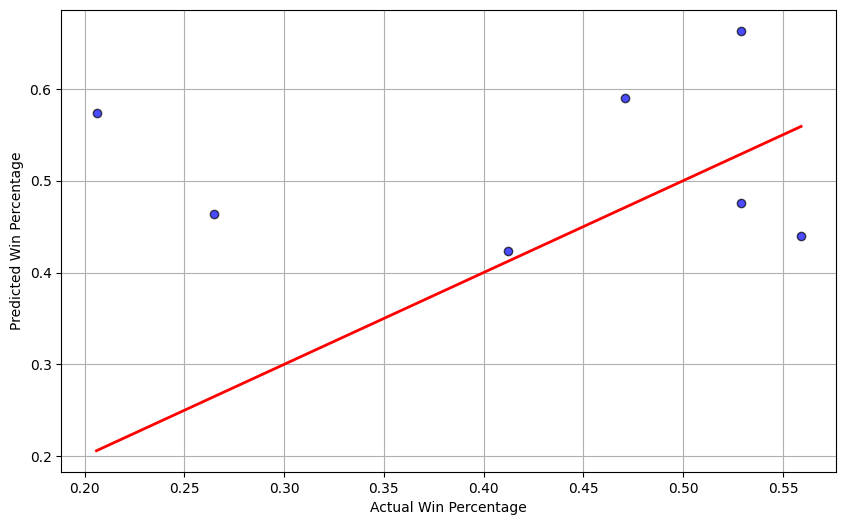

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_lr, y_pred_lr, color='blue', edgecolors='k', alpha=0.7)
plt.plot([y_test_lr.min(), y_test_lr.max()], [y_test_lr.min(), y_test_lr.max()], color='red', lw=2)
plt.xlabel('Actual Win Percentage')
plt.ylabel('Predicted Win Percentage')
plt.grid(True)
plt.show()

In [39]:
df2021 = pd.read_csv('nfl2021.csv')
print(df2021.head())

   Unnamed: 0        team  win_pct   yds  ol  dl  pass_td  int  passer_rating  \
0           0     Cowboys    0.706  6919   2   3       40   11          104.8   
1           1  Buccaneers    0.765  6901   1   2       43   12          101.6   
2           2       Bills    0.647  6493   2   3       36   16           91.3   
3           3      Chiefs    0.706  6746   3   2       37   13           98.1   
4           4    Chargers    0.529  6634   2   2       38   15           97.4   

   pen  ...  score_pct_allowed  sk_allowed_pct  to_forced_pct  to_pct  \
0  127  ...               32.5             4.9           16.7     9.9   
1   97  ...               33.5             3.1           14.7     9.8   
2  113  ...               28.0             4.0           14.5    11.3   
3  111  ...               37.3             4.0           16.0    13.7   
4  116  ...               45.3             4.4           11.2    12.0   

   yds_allowed_per_play  yds_per_pass  yds_per_rush    te     lb     db  


In [41]:
df2021['season'] = 2021
df['season'] = 2022

In [42]:
df_combined = pd.concat([df, df2021], ignore_index=True)    

In [46]:
df_combined.size
df2021.size 

896

In [47]:
print(df_combined.isnull().sum())

Unnamed: 0              0
team                    0
win_pct                 0
yds                     0
ol                      0
dl                      0
pass_td                 0
int                     0
passer_rating           0
pen                     0
pen_yds                 0
points_allowed          0
rush_att                0
rush_td                 0
rush_yds                0
rush_yds_game           0
score_pct               0
score_pct_allowed       0
sk_allowed_pct          0
to_forced_pct           0
to_pct                  0
yds_allowed_per_play    0
yds_per_pass            0
yds_per_rush            0
te                      0
lb                      0
db                      0
season                  0
dtype: int64


In [48]:
feature_columns = ['points_allowed', 'score_pct_allowed', 'yds_allowed_per_play', 'to_forced_pct', 'int']

In [50]:
scaler = StandardScaler()

df_combined[feature_columns] = scaler.fit_transform(df_combined[feature_columns])
print(df_combined[feature_columns].head())

   points_allowed  score_pct_allowed  yds_allowed_per_play  to_forced_pct  \
0       -0.245325          -0.258299             -0.927912      -0.415299   
1       -0.771490          -1.025658             -1.827706       1.322846   
2       -0.813584          -0.784488             -0.927912       1.721171   
3       -1.992195          -1.332602             -0.927912       1.033155   
4        0.975380           0.903703              2.371331       0.164083   

        int  
0 -0.392523  
1 -1.229906  
2  1.282242  
3  0.165732  
4 -1.788161  


In [51]:
# Define feature matrix X and target vector y
X = df_combined[feature_columns]
y = df_combined['win_pct']

# Split into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (51, 5)
Testing set shape: (13, 5)


In [54]:
# Define scaling factors based on feature importance
importance_weights = {
    'points_allowed': 2.0,    # Higher weight
    'to_forced_pct': 2.0,     # Higher weight
    'score_pct_allowed': 1.0,
    'yds_allowed_per_play': 1.0,
    'int': 1.0
}


In [55]:
# Create a copy to avoid modifying the original data
X_weighted = X_train.copy()

# Apply weights to the features
for feature, weight in importance_weights.items():
    X_weighted[feature] = X_weighted[feature] * weight

# Similarly, apply weights to the test set
X_test_weighted = X_test.copy()
for feature, weight in importance_weights.items():
    X_test_weighted[feature] = X_test_weighted[feature] * weight


In [56]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the weighted training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_weighted)
X_test_scaled = scaler.transform(X_test_weighted)


In [58]:
from sklearn.preprocessing import PolynomialFeatures

# Define the degree of the polynomial
degree = 3  # You can adjust this value as needed

# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=degree, include_bias=False)

# Transform the weighted and scaled training data
X_train_poly = poly.fit_transform(X_train_scaled)

# Transform the weighted and scaled testing data
X_test_poly = poly.transform(X_test_scaled)

# Get feature names for interpretation
poly_features = poly.get_feature_names_out(['points_allowed', 'to_forced_pct', 
                                          'score_pct_allowed', 'yds_allowed_per_play', 'int'])


In [59]:
poly_reg_model = LinearRegression()

In [60]:
poly_reg_model.fit(X_train_poly, y_train)

LinearRegression()

In [61]:
# Predict on the testing set
y_pred_poly = poly_reg_model.predict(X_test_poly)

# Calculate evaluation metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_poly:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly:.4f}")
print(f"R-squared (R²): {r2_poly:.4f}")

Polynomial Regression Performance:
Mean Squared Error (MSE): 0.3226
Root Mean Squared Error (RMSE): 0.5679
R-squared (R²): -10.2295
